This notebook uses publishd rates and duration/center of R3's activity window to predict the values at higher frequencies. 

In input data sets are LOFAR, CHIME, and Apertif, as these are arguably the least biased. 

In [1]:
import numpy as np
import matplotlib.pyplot as py

In [52]:
#Some source values
duty_cycle = 0.25
gamma = -1.5    #Value from the CHIME/FRB R3 discovery Nature paper

#Fluence threshold of 
# Eff C-band receiver at two different burst durations
F_CX1ms = 7*26/np.sqrt(2*2e9)*np.sqrt(1e-3)/1e-3 #Jy ms
F_CX100us = 7*26/np.sqrt(2*2e9)*np.sqrt(1e-4)/1e-3 #Jy ms

#Effelsberg 7 beam fluence threshold
F_SB = 0.2 #Jy ms

print("Fluence threshold at 1 ms: %f Jy ms" % F_CX1ms)
print("Fluence threshold at 0.1 ms: %f Jy ms\n" % F_CX100us)

#Rates and fluence threshold from Ines's paper
R_LOFAR = 3.9e-2 #per hr (averged over full cycle)
F_LOFAR = 50. #Jy ms

R_APERTIF = 8e-2 #per hr (averaged over full cycle)
F_APERTIF = 1 #Jy ms

#Rate and fluence threshold from Ziggy's paper 
# (LOFAR rate factor of 3 larger than Ines' rate. Just pick one for calc.)
#R_LOFAR = 0.32*5/16.3
#F_LOFAR = 26 #Jy ms

R_CHIME = 0.8*5.2/16.3 #per hr averaged over full cycle)
F_CHIME = 5.1 #Jy ms

# Apertif's threshold is 1 Jy ms, so I scale LOFAR and CHIME rates
#  to that value for simplicity
#Scaling the LOFAR rate to 1 Jy ms
R_L1 = R_LOFAR*(F_APERTIF / F_LOFAR)**gamma
#Scaling CHIME rate to 1 Jy ms
R_C1 = R_CHIME*(F_APERTIF / F_CHIME)**gamma

print("Rate of LOFAR bursts per hour (F > %d Jy ms): %2.3f" % (F_LOFAR, R_LOFAR))
print("Rate of LOFAR bursts per hour (F > 1 Jy ms): %2.3f \n" % R_L1)
print("Rate of CHIME bursts per hour (F > 1 Jy ms): %2.3f\n" % R_C1)
print("Rate of APERTIF bursts per hour (F > 1 Jy ms): %2.3f" % R_APERTIF)

Fluence threshold at 1 ms: 0.091000 Jy ms
Fluence threshold at 0.1 ms: 0.028777 Jy ms

Rate of LOFAR bursts per hour (F > 50 Jy ms): 0.039
Rate of LOFAR bursts per hour (F > 1 Jy ms): 13.789 

Rate of CHIME bursts per hour (F > 1 Jy ms): 2.939

Rate of APERTIF bursts per hour (F > 1 Jy ms): 0.080


In [46]:
#Estimating spectral index 
# R_0 = R_1 (f0/f1)**(-alpha*gamma)

freq_list = np.array([150., 600., 1370.])
rate_list = np.array([R_L1, R_C1, R_APERTIF])  #Rates need to referenced to same fluence threshold

alphgamma,b=np.polyfit(np.log10(freq_list), np.log10(rate_list), 1)
alpha = -alphgamma/gamma

rate_freq = lambda ff: 10**b*ff**alphgamma

print("Estimated spectral dependence of rate:", alpha)
#print(b)

Estimated spectral dependence of rate: -1.4682014851417067


In [47]:
#Estimated rate of burst at 6 GHz
#R_CX1ms = R_APERTIF*(6/1.37)**alpha*(F_CX1ms/F_APERTIF)**gamma
#R_CX100us = R_APERTIF*(6/1.37)**alpha*(F_CX100us/F_APERTIF)**gamma

R_CX1ms = rate_freq(6000.)*(F_CX1ms)**gamma
R_CX100us = rate_freq(6000.)*(F_CX100us)**gamma

R_1CX = rate_freq(4000)

print("Estimated rate of bursts with CX receiver with W = 1ms: ", R_CX1ms)
print("Estimated rate of bursts with CX receiver with W = 100us: ", R_CX100us)
#print("Estimated number of hours for 1 burst:", 1/R_CX)

print("Estimated rate of bursts with CX receiver @ 1 Jy ms: ", R_1CX)

#print("Estimated rate of bursts with CX recever in active window: ", R_CX/duty_cycle)
#print("Estimated number of hours in active window for 1 burst:", 1/R_CX*duty_cycle)

#R_blah = R_LOFAR*(4/0.15)**-2.3
#print(R_blah)

Estimated rate of bursts with CX receiver with W = 1ms:  0.22422250272741326
Estimated rate of bursts with CX receiver with W = 100us:  1.2608957932123022
Estimated rate of bursts with CX receiver @ 1 Jy ms:  0.015033062268220251


In [48]:
#Estimated rate of bursts at 1.4 GHz with the 7-beam
R_SB = R_APERTIF*(F_SB/F_APERTIF)**gamma
R_1SB = R_APERTIF
R_o1SB = R_1SB*np.sqrt(0.1)**gamma

print("Estimated rate of bursts (per hr) with the 7-beam: ", R_SB)
print("Estimated number of hours for 1 burst: ", 1/R_SB)

print("Estimated rate of bursts (per hr) with the 7-beam @ 1 Jyms: ", R_1SB)

print("Estimated rate of bursts (per hr) in active window: ", R_SB/duty_cycle)
print("Estimated number of hours for 1 burst: ", 1/R_SB*duty_cycle)

Estimated rate of bursts (per hr) with the 7-beam:  0.8944271909999157
Estimated number of hours for 1 burst:  1.1180339887498951
Estimated rate of bursts (per hr) with the 7-beam @ 1 Jyms:  0.08
Estimated rate of bursts (per hr) in active window:  3.577708763999663
Estimated number of hours for 1 burst:  0.2795084971874738


In [53]:
#Estimating CHIME rates
# This is just do double check that my results are self-consistent
R_eC = R_APERTIF*(F_CHIME/F_APERTIF)**gamma*(0.6/1.37)**(alpha*gamma)
R_eC = R_LOFAR*(F_CHIME/F_LOFAR)**gamma*(0.6/0.15)**(alpha*gamma)
#R_eC = R_L1*(0.6/0.15)**alpha*F_CHIME**gamma

R_eC = R_C1*rate_freq(600)*(F_CHIME)**gamma

print("Estimated rate of bursts at CHIME: ", R_eC)
print("Measured rate of bursts at CHIME:", R_CHIME)

Estimated rate of bursts at CHIME:  0.2502933079970989
Measured rate of bursts at CHIME: 0.25521472392638034


Text(0, 0.5, 'Rate (per hr)')

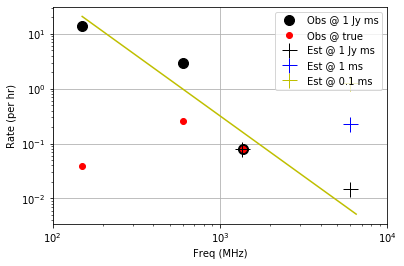

In [50]:
# Now make a complicated plot
# "Obs" values are measured or predicted values for telescope used as input 
# "Est" values are predicted for a "new" telescope based entirely on the modeling
freq_list = np.array([150., 600., 1370., 1360., 6000.])
freq_obs = np.array([150., 600., 1370.])
freq_sc = np.array([1360, 6000])

rate_1Jyms_obs = np.array([R_L1, R_C1, R_APERTIF])
rate_1Jyms_sc = np.array([R_1SB, R_1CX])
rate_1ms_sc = np.array([R_CX1ms])
rate_100us_sc = np.array([R_CX100us])
rate_obs = np.array([R_LOFAR, R_CHIME, R_APERTIF])
#rate_sc = np.array([R_SB, R_CX])

fdum=np.arange(150,6500,1)
#rate_scaled = 10**b*(fdum)**alpha

py.plot(freq_obs, rate_1Jyms_obs, 'ko', ms=10, label='Obs @ 1 Jy ms')
py.plot(freq_obs, rate_obs, 'ro', label='Obs @ true')
py.plot(freq_sc, rate_1Jyms_sc, 'k+', ms=15, label='Est @ 1 Jy ms')
py.plot(freq_sc[1], rate_1ms_sc, 'b+', ms=15, label='Est @ 1 ms')
py.plot(freq_sc[1], rate_100us_sc, 'y+', ms=15, label='Est @ 0.1 ms')
#py.plot(freq_sc, rate_sc, 'r+', ms=15, label='Est @ true')

py.plot(fdum, rate_freq(fdum), 'y-')
py.xscale('log')
py.yscale('log')
py.xlim(1e2, 1e4)
py.legend()
py.grid()
py.xlabel('Freq (MHz)')
py.ylabel('Rate (per hr)')

In [51]:
#Now estimate left and right edges of the active window at higher frequencies 

Pa=16.33  #activity period in days
freq = np.array([150, 600, 1370])   #Center freq. of windows
fdum = np.logspace(2,4,25)          #Dummy freq. array for plotting later

#Shift of the center in days relative to CHIME's center
sh_days = np.array([2.6, 0, -0.7])   
sh_phase = sh_days/Pa+0.5            #Convert to activity phase

#Width of the active window in days
fw_days=np.array([0.8*2.7, 2.3, 1.1])   
hw_phase=fw_days/(2*Pa)            #Convert to activity phase

#Model shift in window vs. freq. as a power law
aa,bb=np.polyfit(np.log10(freq), np.log10(sh_phase), 1)
print("Power law index = ", aa)

#Predict the window center for bottom, center, and top of CX band
p4=10**bb*4000**aa
p6=10**bb*6000**aa
p8=10**bb*8000**aa

print("Phase at 4 GHz: %1.2f" % p4 )
print("Phase at 6 GHz: %1.2f" % p6 )
print("Phase at 8 GHz: %1.2f" % p8 )
#al,bl=np.polyfit(freq, shift, 1)
#print("Linear slope = ", al)

#Model width variation with power law
#Note, I'm only using CHIME and Apertif since the LOFAR window is not well sampled
#  Take this with a large grain of salt since there are only two points
si=1
cc,dd=np.polyfit(np.log10(freq[si:]), np.log10(fw_days[si:]), 1)

#Calc activity window widths
w2=10**dd*2000**cc
w4=10**dd*4000**cc
w6=10**dd*6000**cc
w8=10**dd*8000**cc

print("")
#print("Width at 2 GHz = %1.2f days = %1.2f" % (w2, w2/Pa))
print("Width at 4 GHz = %1.2f days (phase %1.2f; hours = %1.2f)" % (w4, w4/Pa, 24*w4))
print("Width at 6 GHz = %1.2f days (phase %1.2f; hours = %1.2f)" % (w6, w6/Pa, 24*w6))
print("Width at 8 GHz = %1.2f days (phase %1.2f; hours = %1.2f)" % (w8, w8/Pa, 24*w8))

print("")
print("Edges in phase")
print("Edges at 4 GHz: %1.2f %1.2f" % (p4 - w4/(2*Pa), p4 + w4/(2*Pa)))
print("Edges at 6 GHz: %1.2f %1.2f" % (p6 - w6/(2*Pa), p6 + w6/(2*Pa)))
print("Edges at 8 GHz: %1.2f %1.2f" % (p8 - w6/(2*Pa), p8 + w8/(2*Pa)))

Power law index =  -0.16901621397968947
Phase at 4 GHz: 0.37
Phase at 6 GHz: 0.35
Phase at 8 GHz: 0.33

Width at 4 GHz = 0.42 days (phase 0.03; hours = 10.14)
Width at 6 GHz = 0.29 days (phase 0.02; hours = 7.06)
Width at 8 GHz = 0.23 days (phase 0.01; hours = 5.46)

Edges in phase
Edges at 4 GHz: 0.36 0.39
Edges at 6 GHz: 0.34 0.36
Edges at 8 GHz: 0.32 0.34


(0, 8200)

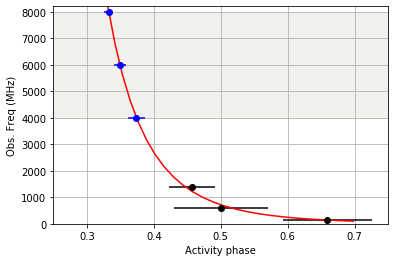

In [57]:
#Plot the windows based on calculations in previous cell.
#Plot width of window vs observing freq. 
py.plot(10**bb*fdum**aa, fdum, 'r-')
py.errorbar(sh_phase, freq, xerr=hw_phase, fmt='o', color='k')
py.errorbar([p4,p6,p8], [4000,6000,8000], xerr=[w4/(2*Pa), w6/(2*Pa), w8/(2*Pa)], fmt='o', color='b')
py.axhspan(4e3,8e3,color='#F1F0ED')
py.grid()
py.xlabel('Activity phase')
py.ylabel('Obs. Freq (MHz)')
py.xlim((0.25,0.75))
py.ylim((0,8200))

#Plot width
#py.figure()
#py.plot(freq[si:], fw_days[si:], 'bo')
#py.plot(fdum, 10**dd*fdum**cc, 'k-')
#py.plot([4000,8000], [w4,w8], 'ro')
#py.grid()
#py.ylabel('Window duration (days)')
#py.xlabel('Freq (MHz)')
#py.yscale('log')
#py.xscale('log')